In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import sqlite3

In [89]:
Veri_Seti3_201701_In = pd.read_csv('./Dataset 3/Dataset 3_201701_In.csv')

In [90]:
pd.DataFrame(Veri_Seti3_201701_In, index = [0,1,2,3,4])

,CALLER_ID,TIMESTAMP,ID,CITY_ID
0,1100144895,02-01-2017 12:52,568,7
1,1100144895,02-01-2017 20:40,568,7
2,1100144895,02-01-2017 21:41,568,7
3,1100144895,03-01-2017 14:57,828,7
4,1100144895,05-01-2017 10:01,568,7


## Extract information from January dataset

In [92]:
JanuaryIn = np.asarray(Veri_Seti3_201701_In)

In [93]:
length, width = JanuaryIn.shape

In [94]:
print ('there are {} calls recorded in this dataset'.format(length))

there are 998625 calls recorded in this dataset


### Extract timestamp

In [95]:
timestamp = pd.to_datetime(JanuaryIn[0:length,1], format="%d-%m-%Y %H:%M")

### Extract called ID

In [98]:
callerID = JanuaryIn[:,0]

In [99]:
callerID = callerID.astype(str)

### Extract prefix

In [100]:
prefix = []
for i in callerID:
    prefix.append(i[0])

prefix = np.asarray(prefix)
prefix = prefix.astype(int)

In [101]:
unique, counts = np.unique(prefix, return_counts=True)
print ('there are {} refugee calls in this dataset'.format(counts[1]))

there are 758728 refugee calls in this dataset


### Extract city ID

In [102]:
cityID = JanuaryIn[:,3]

## Analyse data

In [103]:
to_analyse = [] #narrow down the callerIDs to analyse based on prefix
for i in range(len(callerID)):
    if prefix[i] == 2:
        if callerID[i] not in to_analyse:
                to_analyse.append(callerID[i])

In [104]:
to_analyse = np.asarray(to_analyse)

In [105]:
assert np.unique(to_analyse).shape == to_analyse.shape

Accessing date

In [19]:
evening_location = {}
for i in to_analyse:
    location = np.where(callerID == i)
    location = np.asarray(location)
    location = location.reshape(-1)
    dates = []
    cities = []
    for j in location:
        if timestamp.hours[j] >= 18 or timestamp.hours[j] <= 7:
            dates.append(timestamp.date[j])
            cities.append(cityID[j])
    evening_location[i] = {
    'cities':cities,
    'dates': dates
    }

Save evening_locations file

In [21]:
with open("evening_location.pkl", "wb") as fp:   #Pickling
    pickle.dump(evening_location, fp)

In [22]:
with open("evening_location.pkl", "rb") as fp:   # Unpickling
    evening_location = pickle.load(fp)

In [26]:
to_plot = [] #find the refugees who spend their time in more that one city in the evening over the month
for i in evening_location:
    unique, counts = np.unique(evening_location[i]['cities'], return_counts=True)
    if len(unique) > 1:
        to_plot.append(i)

In [28]:
print ('there are {} callers out ot 50,000 refugees who moved cities'.format(len(to_plot)))

there are 1159 callers out ot 50,000 refugees who moved cities


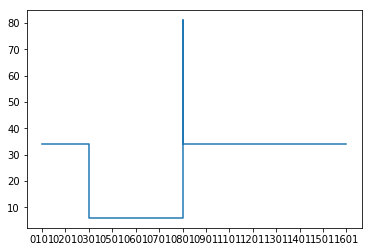

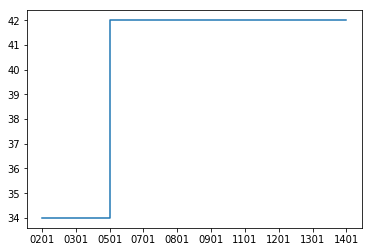

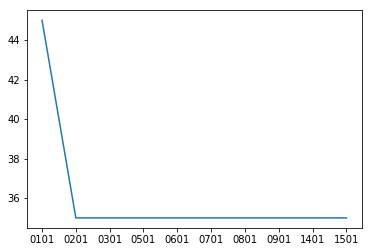

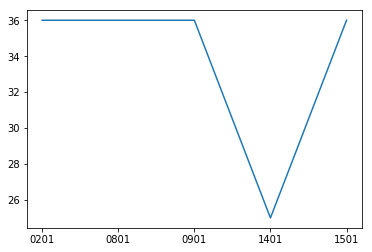

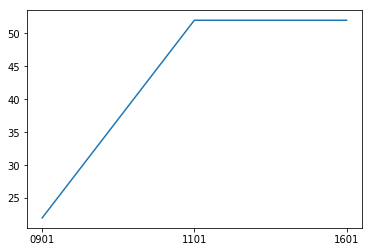

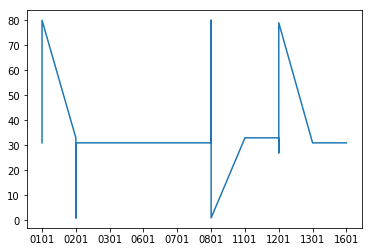

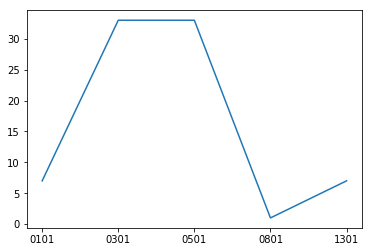

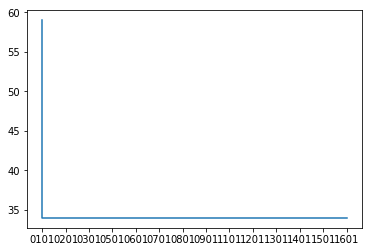

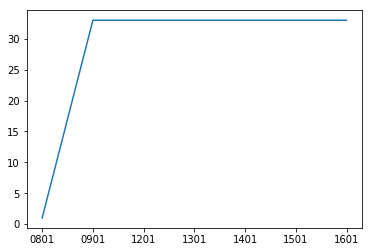

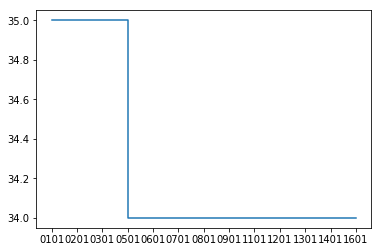

In [30]:
for i in range(10):
    fig=plt.figure()
    plt.plot(evening_location[to_plot[i]]['dates'], evening_location[to_plot[i]]['cities'])
    plt.show()

Compare against non-refugee population

Note: need to update this for dictionaries

In [55]:
non_to_analyse = [] #narrow down the callerIDs to analyse based on prefix
for i in range(len(callerID)):
    if prefix[i] == 1:
        if callerID[i] not in non_to_analyse:
                non_to_analyse.append(callerID[i])

In [56]:
non_to_analyse = np.asarray(non_to_analyse)

In [57]:
assert np.unique(non_to_analyse).shape == non_to_analyse.shape

In [61]:
non_evening_location = [] #find the cities refugees are in in the evening
for i in non_to_analyse:
    location = np.where(callerID == i)
    location = np.asarray(location)
    location = location.reshape(-1)
    dates = []
    cities = []
    for j in location:
        if hours[j] >= 18 or hours[j] <= 7:
            dates.append(day_month[j])
            cities.append(cityID[j])
    non_evening_location.append(i)
    non_evening_location.append(cities)
    non_evening_location.append(dates)

In [62]:
with open("non_evening_location.txt", "wb") as fp:   #Pickling
    pickle.dump(non_evening_location, fp)

In [63]:
with open("non_evening_location.txt", "rb") as fp:   # Unpickling
    non_evening_location = pickle.load(fp)

In [64]:
non_to_plot = [] #find the refugees who spend their time in more that one city in the evening over the month
i = 1
while i < len(non_evening_location):
    unique, counts = np.unique(non_evening_location[i], return_counts=True)
    if len(unique) > 1:
        non_to_plot.append(non_evening_location[i-1])
        non_to_plot.append(non_evening_location[i])
        non_to_plot.append(non_evening_location[i+1])
    i += 3

In [76]:
print ('there are {} callers out ot 50,000 refugees who moved cities'.format(len(non_to_plot)/3))

there are 449 callers out ot 50,000 refugees who moved cities


In [77]:
print ('there are {} times as many refugees who moved cities as non-refugees'.format(
    round(float(len(to_plot))/float(len(non_to_plot)),2)))

there are 2.58 times as many refugees who moved cities as non-refugees


In [106]:
dictionary = {}

In [109]:
dictionary['345345'] = {
    'cities':[234,5,3,1],
    'dates': ['2344','2342','5432','4323'],
}

In [135]:
for i in to_analyse:
    dictionary[i] = {
        'cities':cities,
        'dates': dates,
    }

In [121]:
dictionary['345345']['dates']

['2344', '2342', '5432', '4323']